### Neural Network Classification with MNIST (Digits)

### Goal of the task 

###### I want to build a feed-forward neural network in Keras using the MNIST digits dataset, So that I can experience how neural networks recognize patterns in images and learn the difference between activation functions, losses, and optimizers in a classification setting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.optimizers import Adam, SGD
from keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from keras.activations import relu, sigmoid, softmax
from keras.callbacks import EarlyStopping

In [2]:
# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)
X = X.reshape((X.shape[0], -1)).astype('float32') / 255.0
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# flatten the images
X_train = X_train.reshape((X_train.shape[0], -1))
X_val = X_val.reshape((X_val.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))
y_train_cat = to_categorical(y_train, num_classes=10)
y_val_cat = to_categorical(y_val, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

#hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
#build the model
from pyexpat import model

def build_model(activation='relu',optimizer='adam', loss='sparse_categorical_crossentropy'):
    model = Sequential()
    model.add(Dense(128, activation=activation, input_shape=(784,)))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    return model

In [5]:
#Relu 
model_relu = build_model(activation='relu', optimizer='adam', loss='categorical_crossentropy')
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_relu = model_relu.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=3)])
#Sigmoid
model_sigmoid = build_model(activation='sigmoid', optimizer='adam', loss='categorical_crossentropy')
model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_sigmoid = model_sigmoid.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

Epoch 1/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8961 - loss: 0.3374 - val_accuracy: 0.9572 - val_loss: 0.1445
Epoch 2/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9522 - loss: 0.1597 - val_accuracy: 0.9672 - val_loss: 0.1079
Epoch 3/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9626 - loss: 0.1236 - val_accuracy: 0.9699 - val_loss: 0.0983
Epoch 4/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9678 - loss: 0.1031 - val_accuracy: 0.9724 - val_loss: 0.0928
Epoch 5/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9714 - loss: 0.0940 - val_accuracy: 0.9737 - val_loss: 0.0879
Epoch 6/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9744 - loss: 0.0824 - val_accuracy: 0.9764 - val_loss: 0.0791
Epoch 7/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9768 - loss: 0.0746 - val_accuracy: 0.9766 - val_loss: 0.0809
Epoch 8/20
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9773 - loss: 0.0721 - 

In [6]:
#training with adam
model_adam = build_model(activation='relu', optimizer='adam', loss='categorical_crossentropy')
model_adam.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_adam = model_adam.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

Epoch 1/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8971 - loss: 0.3424 - val_accuracy: 0.9551 - val_loss: 0.1477
Epoch 2/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9523 - loss: 0.1611 - val_accuracy: 0.9659 - val_loss: 0.1114
Epoch 3/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9605 - loss: 0.1266 - val_accuracy: 0.9691 - val_loss: 0.1049
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9685 - loss: 0.1037 - val_accuracy: 0.9718 - val_loss: 0.0879
Epoch 5/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9723 - loss: 0.0915 - val_accuracy: 0.9755 - val_loss: 0.0874
Epoch 6/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9747 - loss: 0.0833 - val_accuracy: 0.9740 - val_loss: 0.0859
Epoch 7/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9766 - loss: 0.0769 - val_accuracy: 0.9743 - val_loss: 0.0893
Epoch 8/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9778 - loss: 0.0691 - 

In [7]:
#hidden layer
model_1 = build_model(activation='relu', optimizer='adam', loss='categorical_crossentropy')
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_1 = model_1.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=3)])
#hidden layer
model_2 = build_model(activation='relu', optimizer='adam', loss='categorical_crossentropy')
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_2 = model_2.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

print("model 1 summary")
model_1.summary()
print("model 2 summary")
model_2.summary()

Epoch 1/10


c:\Users\bbuser\Desktop\DataSience-brain-bytes\DataScience-Brain-Bytes\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8964 - loss: 0.3441 - val_accuracy: 0.9557 - val_loss: 0.1438
Epoch 2/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9513 - loss: 0.1598 - val_accuracy: 0.9659 - val_loss: 0.1127
Epoch 3/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9619 - loss: 0.1248 - val_accuracy: 0.9711 - val_loss: 0.0973
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9680 - loss: 0.1043 - val_accuracy: 0.9731 - val_loss: 0.0910
Epoch 5/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9716 - loss: 0.0921 - val_accuracy: 0.9749 - val_loss: 0.0861
Epoch 6/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9740 - loss: 0.0820 - val_accuracy: 0.9724 - val_loss: 0.0948
Epoch 7/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9763 - loss: 0.0761 - val_accuracy: 0.9754 - val_loss: 0.0845
Epoch 8/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9776 - loss: 0.0713 - val_accurac

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

model 2 summary


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

In [10]:
#mse mae 
model_mse = build_model(activation='relu', optimizer='adam', loss='mean_squared_error')
model_mse.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history_mse = model_mse.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=3)])
model_mae = build_model(activation='relu', optimizer='adam', loss='mean_absolute_error')
model_mae.compile(optimizer='adam', loss='mean_absolute_error', metrics=['accuracy'])
history_mae = model_mae.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=3)])
# Evaluate the model
test_loss, test_acc = model_relu.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)
y_pred = model_relu.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_true, y_pred_classes))
print(confusion_matrix(y_true, y_pred_classes))

Epoch 1/10


c:\Users\bbuser\Desktop\DataSience-brain-bytes\DataScience-Brain-Bytes\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8953 - loss: 0.0158 - val_accuracy: 0.9524 - val_loss: 0.0074
Epoch 2/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9491 - loss: 0.0080 - val_accuracy: 0.9599 - val_loss: 0.0062
Epoch 3/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9576 - loss: 0.0066 - val_accuracy: 0.9621 - val_loss: 0.0058
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9638 - loss: 0.0056 - val_accuracy: 0.9699 - val_loss: 0.0047
Epoch 5/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9664 - loss: 0.0052 - val_accuracy: 0.9677 - val_loss: 0.0051
Epoch 6/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9706 - loss: 0.0046 - val_accuracy: 0.9704 - val_loss: 0.0046
Epoch 7/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9714 - loss: 0.0045 - val_accuracy: 0.9731 - val_loss: 0.0042
Epoch 8/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9727 - loss: 0.0043 - val_accurac

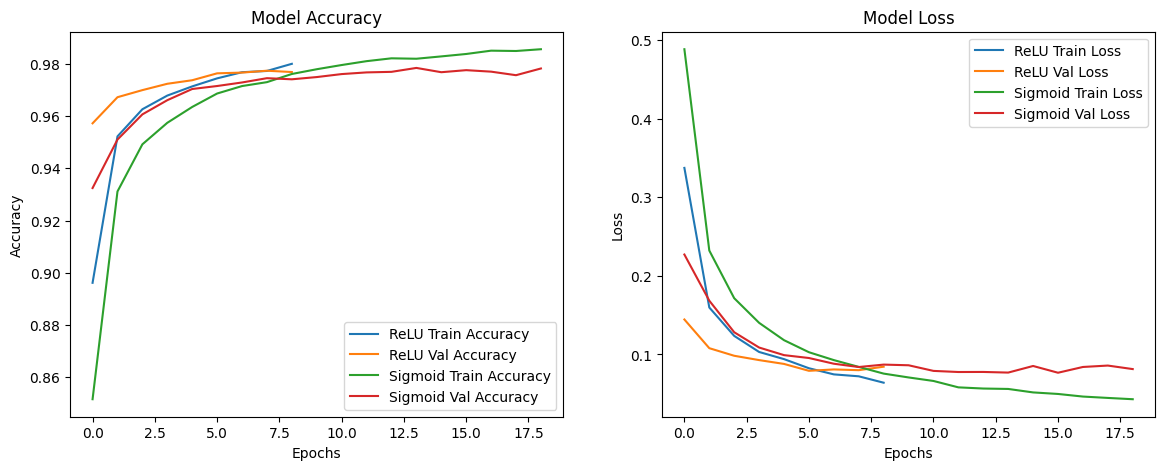

In [8]:
#plotting the results
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history_relu.history['accuracy'], label='ReLU Train Accuracy')
plt.plot(history_relu.history['val_accuracy'], label='ReLU Val Accuracy')
plt.plot(history_sigmoid.history['accuracy'], label='Sigmoid Train Accuracy')
plt.plot(history_sigmoid.history['val_accuracy'], label='Sigmoid Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_relu.history['loss'], label='ReLU Train Loss')
plt.plot(history_relu.history['val_loss'], label='ReLU Val Loss')
plt.plot(history_sigmoid.history['loss'], label='Sigmoid Train Loss')
plt.plot(history_sigmoid.history['val_loss'], label='Sigmoid Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Task: Exploring Neural Network Design Choices

---

## Q1: Effect of Using Sigmoid Instead of ReLU in Hidden Layers

### Theory
- **ReLU**  
  - Outputs positive values directly.  
  - Avoids vanishing gradient problem.  
  - Trains faster.  

- **Sigmoid**  
  - Squashes values between (0,1).  
  - Gradients become very small for large positive/negative inputs → vanishing gradients.  
  - Slower training and worse accuracy.  

### Observation
- Training with **sigmoid** hidden layers was slower.  
- Model performance (MSE / accuracy) was worse compared to ReLU.  
- Sometimes the model got stuck in local minima.  

---

## Q2: Importance of Softmax at the Output Layer

### Theory
- **Softmax**  
  - Converts raw outputs (logits) into probabilities.  
  - Ensures outputs sum to 1.  
  - Essential for multi-class classification.  

- **Using sigmoid/ReLU at output**  
  - Outputs are not normalized.  
  - Predictions are harder to interpret as probabilities.  

### Observation
- With **softmax**, the model outputs interpretable probabilities for each class.  
- With **sigmoid or ReLU**, probabilities are not valid for multi-class tasks.  

---

## Q3: Doubling the Number of Hidden Layers

### Theory
- More hidden layers → more trainable parameters.  
- Training time increases.  
- Accuracy may improve if the problem is complex.  
- Too many layers can cause overfitting or vanishing gradients.  
- Dropout helps control overfitting but slows convergence.  

### Observation
- Model with **double the layers** required more epochs to converge.  
- Accuracy improved slightly on training data.  
- Risk of overfitting observed if dropout was not applied.  

---

## Q4: Comparing Optimizers (Adam, SGD, RMSprop)

### Theory
- **SGD**
  - Basic optimizer.  
  - Convergence is slow.  
  - Needs careful learning rate tuning.  

- **RMSprop**
  - Adapts learning rate for each parameter.  
  - Faster than SGD, better for non-stationary data.  

- **Adam**
  - Combines RMSprop + momentum.  
  - Adapts learning rate per parameter.  
  - Usually the fastest and most effective optimizer.  

### Observation
- **Adam** converged the fastest and reached higher accuracy.  
- **RMSprop** performed better than SGD, but slower than Adam.  
- **SGD** required careful learning rate adjustment and converged much slower.  

---
